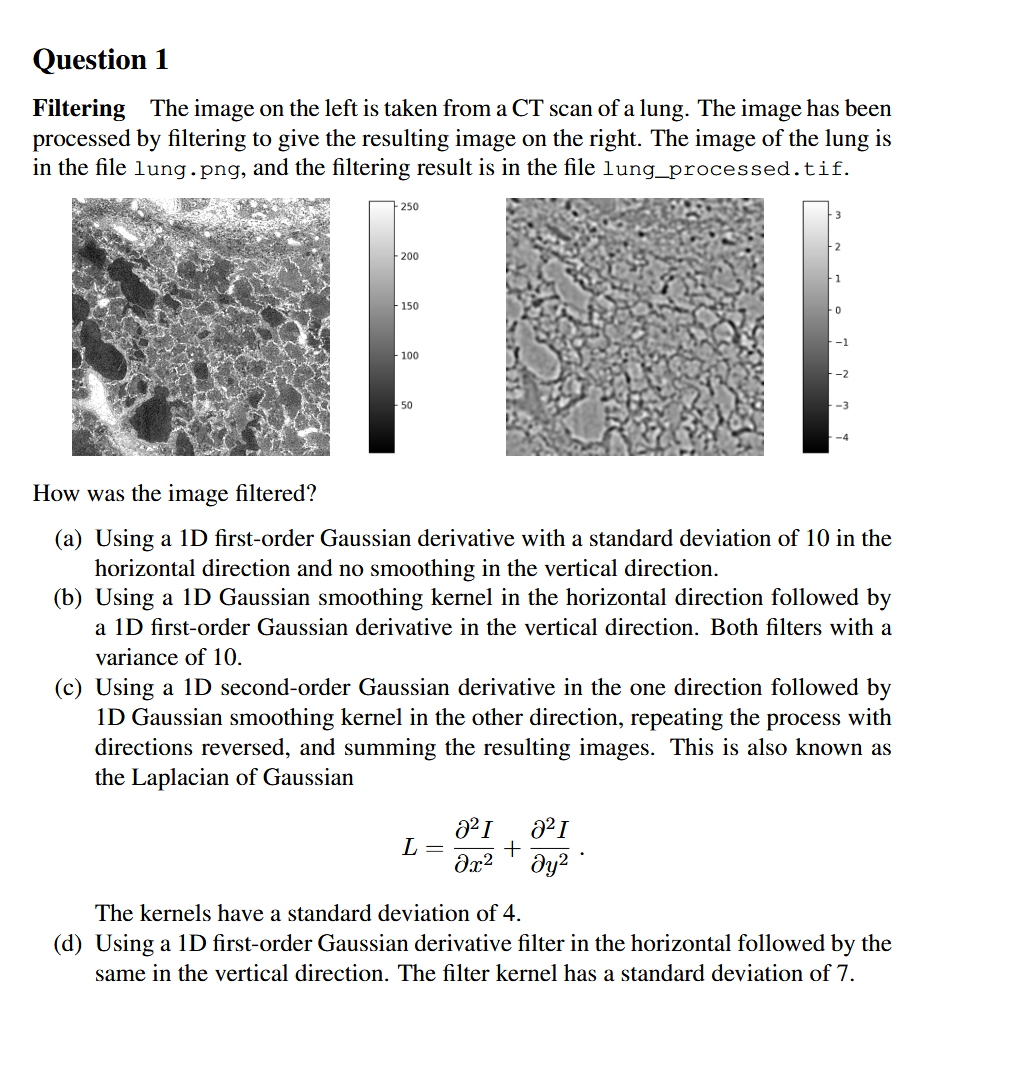

In [13]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%pip install scipy
import numpy as np 
import matplotlib.pyplot as plt
import skimage
from scipy.ndimage import convolve
from scipy.ndimage import gaussian_filter1d, gaussian_filter, gaussian_gradient_magnitude
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage.io import imread

Note: you may need to restart the kernel to use updated packages.


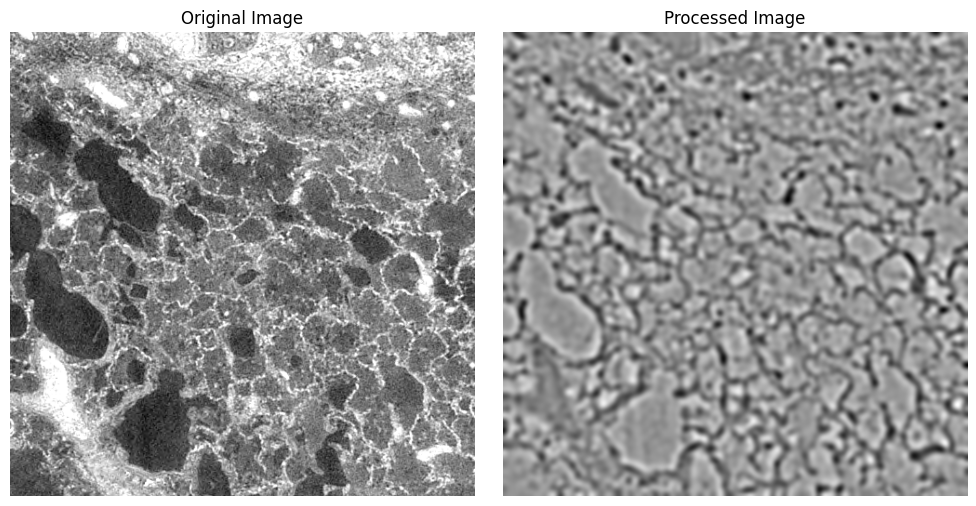

In [9]:
im_procesed = io.imread('data/lung/lung_processed.tif', as_gray=True)
im = io.imread('data/lung/lung.png', as_gray=True)



# visualize the image 
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(im_procesed, cmap='gray')
ax[1].set_title('Processed Image')
ax[1].axis('off')
plt.tight_layout()
plt.show()

In [15]:
def get_gaussian_kernels(s):
    '''
    Returns a 1D Gaussian kernel and its derivative and the x values.
    
    Parameters
    ----------
    s : float
        Standard deviation of the Gaussian kernel.
        
    Returns
    -------
    g : ndarray
        1D Gaussian kernel.
    dg : ndarray
        Derivative of the Gaussian kernel.
    x : ndarray
        x values where the Gaussian is computed.
    '''
    # Variance of the Gaussian
    t = s**2
    # Range for the kernel: covers ±4 standard deviations
    r = np.ceil(4 * s)
    # x values for the kernel, column vector
    x = np.arange(-r, r + 1).reshape(-1, 1)
    # Compute the Gaussian kernel
    g = np.exp(-x**2 / (2 * t))
    # Normalize the kernel so that its sum is 1
    g = g / np.sum(g)
    # Compute the derivative of the Gaussian kernel
    dg = -x * g / t 
    return g, dg, x


def convolve_columns(image, kernel_1D):
    """
    Apply 1D convolution along columns (vertical direction).

    Args:
        image (numpy.ndarray): Input image.
        kernel_1D (numpy.ndarray): 1D Gaussian kernel.

    Returns:
        numpy.ndarray: Image after column-wise convolution.
    """
    column_wise_gaussian_kernel = kernel_1D.reshape(-1, 1)
    return convolve(image, column_wise_gaussian_kernel)

def convolve_rows(image, kernel_1D):
    """
    Apply 1D convolution along rows (horizontal direction).

    Args:
        image (numpy.ndarray): Input image.
        kernel_1D (numpy.ndarray): 1D Gaussian kernel.

    Returns:
        numpy.ndarray: Image after row-wise convolution.
    """
    row_wise_gaussian_kernel = kernel_1D.reshape(1, -1)
    return convolve(image, row_wise_gaussian_kernel)

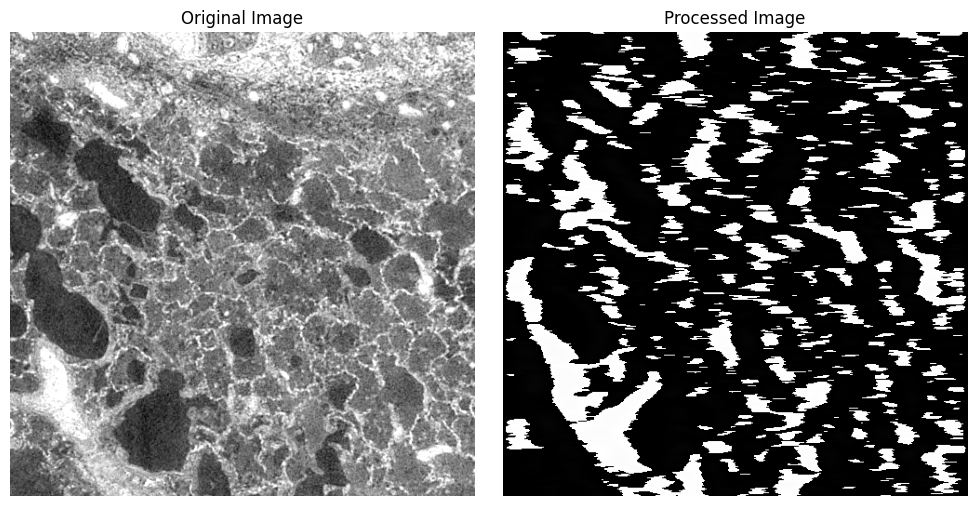

In [17]:
s_a = 10 

k_a, k_a_d, x_a = get_gaussian_kernels(s_a)

i_a = convolve_rows(im, k_a_d)

# visualize the image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(i_a, cmap='gray')
ax[1].set_title('Processed Image')
ax[1].axis('off')
plt.tight_layout()
plt.show()


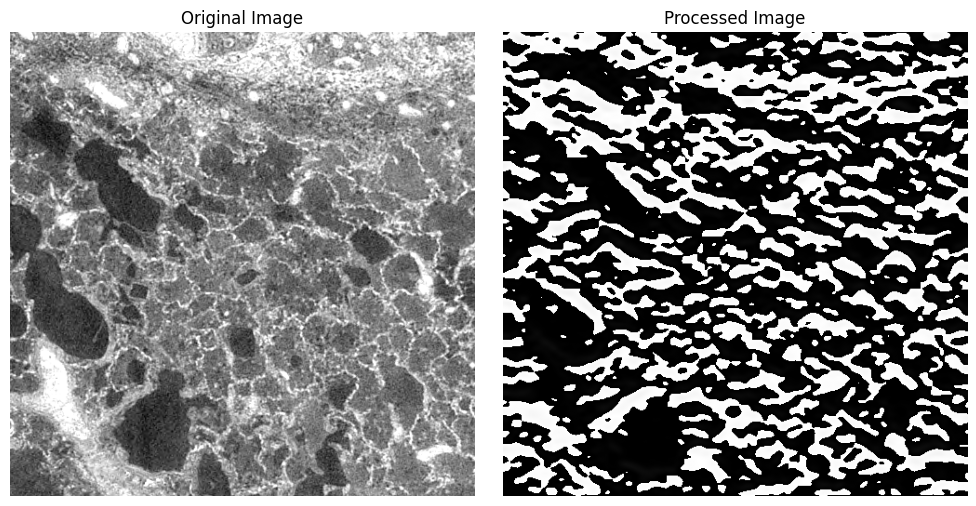

In [18]:
s_b = 3.16 

k_b, k_b_d, x_b = get_gaussian_kernels(s_b)

i_b_hor_smooth = convolve_rows(im, k_b)
i_b_ver_grad = convolve_columns(i_b_hor_smooth, k_b_d)

# visualize the image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(i_b_ver_grad, cmap='gray')
ax[1].set_title('Processed Image')
ax[1].axis('off')
plt.tight_layout()


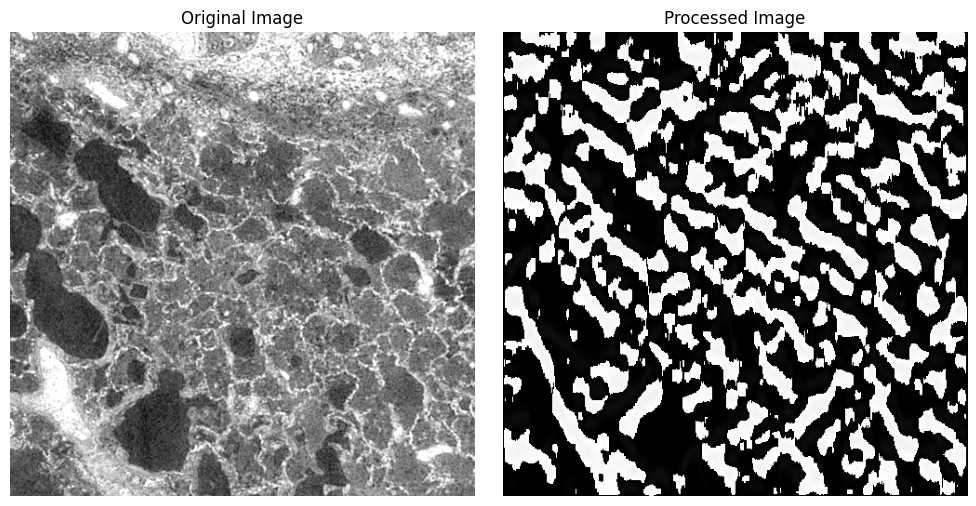

In [19]:
s_d = 7 
k_d, k_d_d, x_d = get_gaussian_kernels(s_d)


derivative_hrizontal_d = convolve_rows(im, k_d_d)
derivative_vertical = convolve_columns(derivative_hrizontal_d, k_d_d)

# visualize the image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(derivative_vertical, cmap='gray')
ax[1].set_title('Processed Image')
ax[1].axis('off')
plt.tight_layout()
plt.show()


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

def get_gaussian_kernels(s):
    '''
    Returns a 1D Gaussian kernel and its derivative and the x values.
    
    Parameters
    ----------
    s : float
        Standard deviation of the Gaussian kernel.
        
    Returns
    -------
    g : ndarray
        1D Gaussian kernel.
    dg : ndarray
        Derivative of the Gaussian kernel.
    x : ndarray
        x values where the Gaussian is computed.
    '''
    # Variance of the Gaussian
    t = s**2
    # Range for the kernel: covers ±4 standard deviations
    r = np.ceil(4 * s)
    # x values for the kernel, column vector
    x = np.arange(-r, r + 1).reshape(-1, 1)
    # Compute the Gaussian kernel
    g = np.exp(-x**2 / (2 * t))
    # Normalize the kernel so that its sum is 1
    g = g / np.sum(g)
    # Compute the derivative of the Gaussian kernel
    dg = -x * g / t 
    return g, dg, x

def get_gaussian_second_derivative(s):
    '''
    Returns the second derivative of a 1D Gaussian kernel.
    
    Parameters
    ----------
    s : float
        Standard deviation of the Gaussian kernel.
        
    Returns
    -------
    d2g : ndarray
        Second derivative of the Gaussian kernel.
    '''
    # Variance of the Gaussian
    t = s**2
    # Range for the kernel: covers ±4 standard deviations
    r = np.ceil(4 * s)
    # x values for the kernel, column vector
    x = np.arange(-r, r + 1).reshape(-1, 1)
    # Compute the Gaussian kernel
    g = np.exp(-x**2 / (2 * t))
    # Normalize the kernel so that its sum is 1
    g = g / np.sum(g)
    # Compute the second derivative of the Gaussian kernel
    d2g = (x**2 / t**2 - 1 / t) * g
    return d2g

def convolve_columns(image, kernel_1D):
    """Apply 1D convolution along columns (vertical direction)."""
    column_wise_gaussian_kernel = kernel_1D.reshape(-1, 1)
    return convolve(image, column_wise_gaussian_kernel)

def convolve_rows(image, kernel_1D):
    """Apply 1D convolution along rows (horizontal direction)."""
    row_wise_gaussian_kernel = kernel_1D.reshape(1, -1)
    return convolve(image, row_wise_gaussian_kernel)

class GaussianFilterChain:
    """
    A class for applying and chaining Gaussian filtering operations.
    
    This allows for flexible specification of filtering sequences and 
    provides plotting capabilities.
    """
    
    def __init__(self, image):
        """
        Initialize with an input image.
        
        Parameters
        ----------
        image : ndarray
            Input image to be filtered.
        """
        self.original_image = image.copy()
        self.current_image = image.copy()
        self.history = [('original', image.copy())]
        
    def apply_operation(self, operation, direction, std_dev, label=None):
        """
        Apply a single Gaussian filtering operation.
        
        Parameters
        ----------
        operation : str
            Type of operation: 'gaussian', 'derivative', 'second_derivative'
        direction : str
            Direction: 'horizontal', 'vertical', 'both'
        std_dev : float
            Standard deviation for the Gaussian kernel
        label : str, optional
            Label for this operation in the history
            
        Returns
        -------
        self : GaussianFilterChain
            Returns self for method chaining
        """
        if operation == 'gaussian':
            g, dg, x = get_gaussian_kernels(std_dev)
            kernel = g.flatten()
        elif operation == 'derivative':
            g, dg, x = get_gaussian_kernels(std_dev)
            kernel = dg.flatten()
        elif operation == 'second_derivative':
            kernel = get_gaussian_second_derivative(std_dev).flatten()
        else:
            raise ValueError("operation must be 'gaussian', 'derivative', or 'second_derivative'")
        
        if direction == 'horizontal':
            result = convolve_rows(self.current_image, kernel)
        elif direction == 'vertical':
            result = convolve_columns(self.current_image, kernel)
        elif direction == 'both':
            # Apply to both directions and sum (like Laplacian)
            result_h = convolve_rows(self.current_image, kernel)
            result_v = convolve_columns(self.current_image, kernel)
            result = result_h + result_v
        else:
            raise ValueError("direction must be 'horizontal', 'vertical', or 'both'")
        
        self.current_image = result
        
        # Create label for history
        if label is None:
            label = f"{operation}_{direction}_std{std_dev}"
        
        self.history.append((label, result.copy()))
        return self
    
    def gaussian(self, direction, std_dev, label=None):
        """Apply Gaussian smoothing."""
        return self.apply_operation('gaussian', direction, std_dev, label)
    
    def derivative(self, direction, std_dev, label=None):
        """Apply first-order Gaussian derivative."""
        return self.apply_operation('derivative', direction, std_dev, label)
    
    def second_derivative(self, direction, std_dev, label=None):
        """Apply second-order Gaussian derivative."""
        return self.apply_operation('second_derivative', direction, std_dev, label)
    
    def laplacian_of_gaussian(self, std_dev, label=None):
        """
        Apply Laplacian of Gaussian (∂²I/∂x² + ∂²I/∂y²).
        This is a convenience method that applies the full LoG operation.
        """
        g, dg, x = get_gaussian_kernels(std_dev)
        d2g = get_gaussian_second_derivative(std_dev)
        
        # ∂²I/∂x²: second derivative in x, smoothing in y
        temp1 = convolve_rows(self.current_image, d2g.flatten())
        result1 = convolve_columns(temp1, g.flatten())
        
        # ∂²I/∂y²: smoothing in x, second derivative in y
        temp2 = convolve_rows(self.current_image, g.flatten())
        result2 = convolve_columns(temp2, d2g.flatten())
        
        # Sum the results
        result = result1 + result2
        self.current_image = result
        
        if label is None:
            label = f"LoG_std{std_dev}"
        
        self.history.append((label, result.copy()))
        return self
    
    def get_result(self):
        """Get the current filtered image."""
        return self.current_image
    
    def get_history(self):
        """Get the complete history of operations."""
        return self.history
    
    def plot_history(self, figsize=(15, 10), cmap='gray'):
        """
        Plot the complete history of filtering operations.
        
        Parameters
        ----------
        figsize : tuple
            Figure size for the plot
        cmap : str
            Colormap for displaying images
        """
        n_images = len(self.history)
        cols = min(4, n_images)
        rows = (n_images + cols - 1) // cols
        
        fig, axes = plt.subplots(rows, cols, figsize=figsize)
        if rows == 1:
            axes = axes.reshape(1, -1) if n_images > 1 else [axes]
        elif cols == 1:
            axes = axes.reshape(-1, 1)
        
        for i, (label, image) in enumerate(self.history):
            row = i // cols
            col = i % cols
            ax = axes[row, col] if rows > 1 else axes[col]
            
            im = ax.imshow(image, cmap=cmap)
            ax.set_title(label, fontsize=10)
            ax.axis('off')
            plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        
        # Hide empty subplots
        for i in range(n_images, rows * cols):
            row = i // cols
            col = i % cols
            ax = axes[row, col] if rows > 1 else axes[col]
            ax.axis('off')
        
        plt.tight_layout()
        plt.show()
    
    def plot_result(self, figsize=(8, 6), cmap='gray', title=None):
        """
        Plot only the final result.
        
        Parameters
        ----------
        figsize : tuple
            Figure size for the plot
        cmap : str
            Colormap for displaying the image
        title : str, optional
            Title for the plot
        """
        plt.figure(figsize=figsize)
        plt.imshow(self.current_image, cmap=cmap)
        if title is None:
            title = f"Final Result (after {len(self.history)-1} operations)"
        plt.title(title)
        plt.colorbar()
        plt.axis('off')
        plt.show()

# Convenience functions for the original filter types
def filter_type_a(image, std_dev=10):
    """(a) 1D first-order Gaussian derivative horizontally only"""
    return (GaussianFilterChain(image)
            .derivative('horizontal', std_dev, 'horizontal_derivative_only')
            .get_result())

def filter_type_b(image, variance=10):
    """(b) 1D Gaussian smoothing horizontally + 1D first-order derivative vertically"""
    std_dev = np.sqrt(variance)
    return (GaussianFilterChain(image)
            .gaussian('horizontal', std_dev, 'horizontal_smoothing')
            .derivative('vertical', std_dev, 'vertical_derivative')
            .get_result())

def filter_type_c(image, std_dev=4):
    """(c) Laplacian of Gaussian"""
    return (GaussianFilterChain(image)
            .laplacian_of_gaussian(std_dev)
            .get_result())

def filter_type_d(image, std_dev=7):
    """(d) 1D first-order derivative horizontally then vertically"""
    return (GaussianFilterChain(image)
            .derivative('horizontal', std_dev, 'horizontal_derivative')
            .derivative('vertical', std_dev, 'vertical_derivative')
            .get_result())

# Standalone Laplacian of Gaussian implementation
def laplacian_of_gaussian_manual(image, std_dev=4):
    """
    Manual implementation of Laplacian of Gaussian using separable filters.
    
    This implements: L = ∂²I/∂x² + ∂²I/∂y²
    
    Parameters
    ----------
    image : ndarray
        Input image
    std_dev : float
        Standard deviation for Gaussian kernels
        
    Returns
    -------
    result : ndarray
        Laplacian of Gaussian filtered image
    """
    # Get the kernels
    g, dg, x = get_gaussian_kernels(std_dev)
    d2g = get_gaussian_second_derivative(std_dev)
    
    # ∂²I/∂x²: Apply second derivative in x, then smooth in y
    temp1 = convolve_rows(image, d2g.flatten())
    term1 = convolve_columns(temp1, g.flatten())
    
    # ∂²I/∂y²: Apply smooth in x, then second derivative in y  
    temp2 = convolve_rows(image, g.flatten())
    term2 = convolve_columns(temp2, d2g.flatten())
    
    # Sum both terms
    result = term1 + term2
    
    return result, term1, term2  # Return components for visualization

def demo_laplacian_of_gaussian(image, std_dev=4):
    """
    Demonstrate the Laplacian of Gaussian filter with step-by-step visualization.
    
    Parameters
    ----------
    image : ndarray
        Input image
    std_dev : float
        Standard deviation for the Gaussian kernels
    """
    print(f"Laplacian of Gaussian with std_dev = {std_dev}")
    print("L = ∂²I/∂x² + ∂²I/∂y²")
    print()
    
    # Method 1: Using the manual implementation to see components
    result_manual, term1, term2 = laplacian_of_gaussian_manual(image, std_dev)
    
    # Method 2: Using the chain system to see each step
    print("Method 1: Step-by-step using chains")
    
    # First term: ∂²I/∂x² (second derivative in x, smoothing in y)
    chain_term1 = (GaussianFilterChain(image)
                   .second_derivative('horizontal', std_dev, '∂²/∂x²')
                   .gaussian('vertical', std_dev, 'smooth_y'))
    
    # Second term: ∂²I/∂y² (smoothing in x, second derivative in y)
    chain_term2 = (GaussianFilterChain(image)
                   .gaussian('horizontal', std_dev, 'smooth_x') 
                   .second_derivative('vertical', std_dev, '∂²/∂y²'))
    
    # Method 3: Using the built-in laplacian_of_gaussian method
    chain_full = GaussianFilterChain(image).laplacian_of_gaussian(std_dev)
    
    # Plot all approaches
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    
    # Original
    axes[0,0].imshow(image, cmap='gray')
    axes[0,0].set_title('Original Image')
    axes[0,0].axis('off')
    
    # Term 1: ∂²I/∂x²
    axes[0,1].imshow(term1, cmap='gray')
    axes[0,1].set_title('∂²I/∂x²\n(2nd deriv x, smooth y)')
    axes[0,1].axis('off')
    
    # Term 2: ∂²I/∂y²
    axes[0,2].imshow(term2, cmap='gray')
    axes[0,2].set_title('∂²I/∂y²\n(smooth x, 2nd deriv y)')
    axes[0,2].axis('off')
    
    # Final result
    axes[0,3].imshow(result_manual, cmap='gray')
    axes[0,3].set_title('L = ∂²I/∂x² + ∂²I/∂y²')
    axes[0,3].axis('off')
    
    # Show the chain steps for term 1
    axes[1,0].imshow(chain_term1.history[1][1], cmap='gray')  # After 2nd derivative
    axes[1,0].set_title('After ∂²/∂x²')
    axes[1,0].axis('off')
    
    axes[1,1].imshow(chain_term1.get_result(), cmap='gray')  # After smoothing
    axes[1,1].set_title('After smooth in y')
    axes[1,1].axis('off')
    
    # Show the chain steps for term 2
    axes[1,2].imshow(chain_term2.history[1][1], cmap='gray')  # After smoothing
    axes[1,2].set_title('After smooth in x')
    axes[1,2].axis('off')
    
    axes[1,3].imshow(chain_term2.get_result(), cmap='gray')  # After 2nd derivative
    axes[1,3].set_title('After ∂²/∂y²')
    axes[1,3].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Show individual chain histories
    print("\nTerm 1 chain (∂²I/∂x²):")
    chain_term1.plot_history()
    
    print("\nTerm 2 chain (∂²I/∂y²):")
    chain_term2.plot_history()
    
    print("\nFull Laplacian of Gaussian:")
    chain_full.plot_history()
    
    return result_manual, chain_term1, chain_term2, chain_full

# Example usage functions
def demo_filter_chains(image):
    """
    Demonstrate all filter types with plotting.
    
    Parameters
    ----------
    image : ndarray
        Input image to filter
    """
    print("Filter Type A: Horizontal derivative only")
    chain_a = GaussianFilterChain(image).derivative('horizontal', 10, 'horizontal_derivative_only')
    chain_a.plot_history()
    
    print("\nFilter Type B: Horizontal smoothing + vertical derivative")
    std_dev = np.sqrt(10)
    chain_b = (GaussianFilterChain(image)
               .gaussian('horizontal', std_dev, 'horizontal_smoothing')
               .derivative('vertical', std_dev, 'vertical_derivative'))
    chain_b.plot_history()
    
    print("\nFilter Type C: Laplacian of Gaussian")
    chain_c = GaussianFilterChain(image).laplacian_of_gaussian(4)
    chain_c.plot_history()
    
    print("\nFilter Type D: Horizontal then vertical derivatives")
    chain_d = (GaussianFilterChain(image)
               .derivative('horizontal', 7, 'horizontal_derivative')
               .derivative('vertical', 7, 'vertical_derivative'))
    chain_d.plot_history()
    
    return chain_a, chain_b, chain_c, chain_d

In [29]:
# Get the individual terms as well as the final result
result, term1, term2 = laplacian_of_gaussian_manual(im, std_dev=4)

# term1 is ∂²I/∂x²
# term2 is ∂²I/∂y²  
# result is term1 + term2

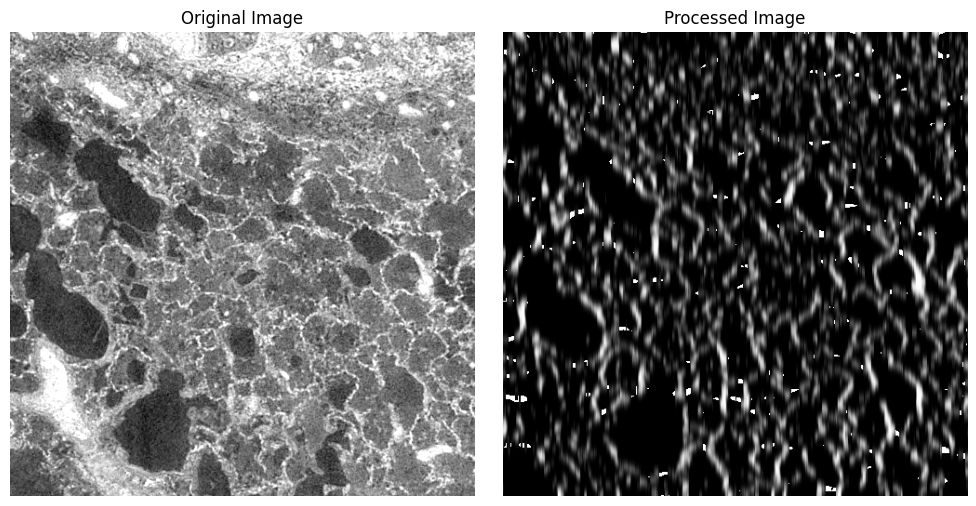

In [30]:
# viuaize result c 

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(result, cmap='gray')
ax[1].set_title('Processed Image')
ax[1].axis('off')
plt.tight_layout()
plt.show()
